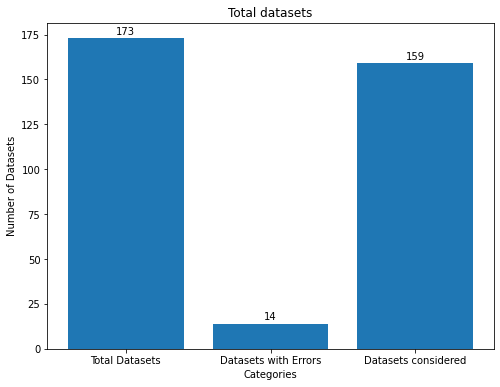

In [24]:
import matplotlib.pyplot as plt

good_datasets = 159
datasets_with_errors = 14
total_datasets = good_datasets + datasets_with_errors

# Data for the bar plot
categories = ['Total Datasets', 'Datasets with Errors', 'Datasets considered']
values = [total_datasets, datasets_with_errors, good_datasets]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, values)
plt.xlabel('Categories')
plt.ylabel('Number of Datasets')
plt.title('Total datasets')

#Adding custom xticks
plt.xticks(categories, categories)  # Set the xticks to be the categories list

# Adding labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom')

plt.show()

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("Datasets.csv")
df.columns

Index(['Dataset', 'Domain', 'Bigdata', 'Merge (train, test, validation)',
       'Seperate label file', 'File conversion', 'Additional files',
       'Multiple sheets', 'Missing data', 'Zip', 'Label', 'Preprocessing',
       'Multiple files', 'Type of Preprocessing', 'Multiple Data files',
       'Dataset characteristics', 'ML', 'On server', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

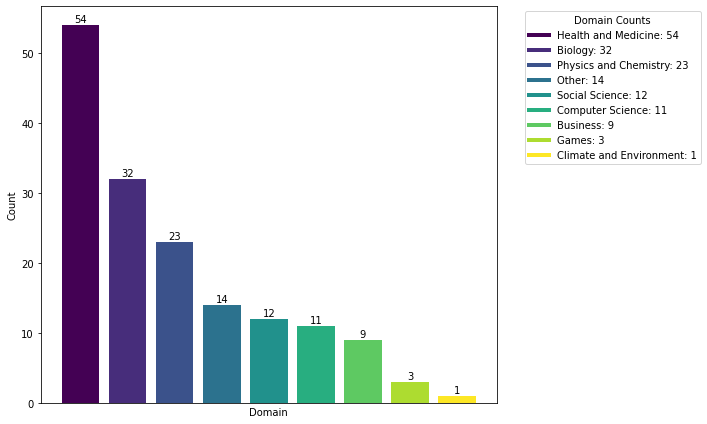

In [25]:
import numpy as np

domain_counts = df['Domain'].value_counts()

colors = plt.cm.viridis(np.linspace(0, 1, len(domain_counts)))

plt.figure(figsize=(10, 6))
bars = plt.bar(domain_counts.index, domain_counts.values, color=colors)
plt.xlabel('Domain')
plt.ylabel('Count')

legend_labels = [f"{domain}: {count}" for domain, count in zip(domain_counts.index, domain_counts.values)]
legend_colors = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
plt.legend(legend_colors, legend_labels, title="Domain Counts", bbox_to_anchor=(1.05, 1), loc='upper left')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, int(yval), ha='center', va='bottom')
plt.xticks([])

plt.tight_layout()
plt.show()

## Additinoal graphs

In [20]:
replace_map = {'yes': 'No', 'no': 'Yes', 'Yes':'No','No':'Yes'}
df = pd.read_csv("KnowledgeBase.csv")
df['Completeness_bins'] = df['Completeness_bins'].map(replace_map)
#df['Conciseness_bins'] = df['Conciseness_bins'].map(replace_map)
#df['ClassImbRatio_bins'] = df['ClassImbRatio_bins'].map(replace_map)
#df['OutlierPerc_bins'] = df['OutlierPerc_bins'].map(replace_map)
#df['ClassOverlapPerc_bins'] = df['ClassOverlapPerc_bins'].map(replace_map)
#df['LabelIssues_bins'] = df['LabelIssues_bins'].map(replace_map)

In [21]:
df.to_csv("KnowledgeBase.csv",index=False)

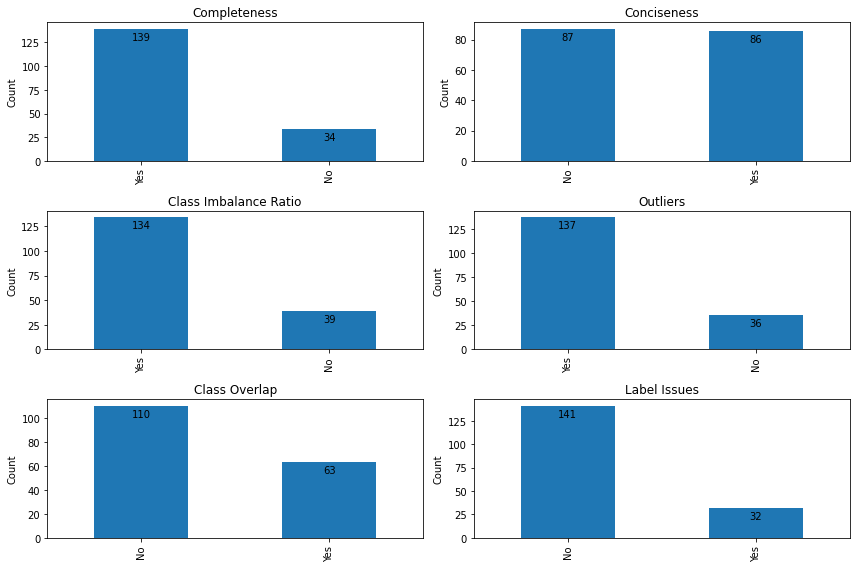

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("KnowledgeBase.csv")

bin_df_plot = df[['Completeness_bins', 'Conciseness_bins','ClassImbRatio_bins', 'OutlierPerc_bins', 'ClassOverlapPerc_bins','LabelIssues_bins']]


bin_df_plot = bin_df_plot.rename(columns={
    'Completeness_bins': 'Completeness',
    'Conciseness_bins': 'Conciseness',
    'ClassImbRatio_bins': 'Class Imbalance Ratio',
    'OutlierPerc_bins' : 'Outliers',
    'ClassOverlapPerc_bins': 'Class Overlap',
    'LabelIssues_bins' : 'Label Issues'
})

# Create a bar plot
fig, ax = plt.subplots(figsize=(12, 8), nrows=3, ncols=2)
x = y = 0

for column in bin_df_plot:
    bin_counts = bin_df_plot[column].value_counts()
    bin_counts.plot(ax=ax[x, y], kind='bar')
    ax[x, y].set_ylabel('Count')
    ax[x, y].set_title(f'{column}')
   # Add count labels on each bar
    for i, v in enumerate(bin_counts):
        ax[x, y].text(i, v - 0.1 * max(bin_counts), str(v), ha='center',va='bottom')
    
    y += 1
    if y == 2:
        x += 1
        y = 0

plt.tight_layout()
plt.show()

In [28]:
df = pd.read_csv("KnowledgeBase.csv")

df['LabelIssuesPerc'] = df['LabelIssues'].apply(len) / df['nr_inst']
df.to_csv("KnowledgeBase.csv", index=False)

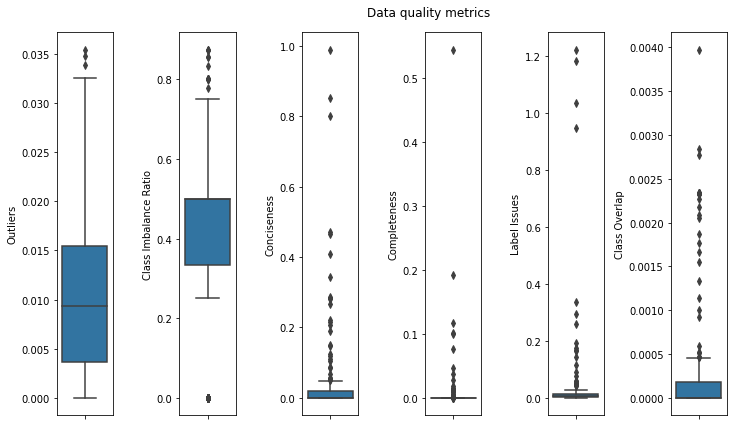

In [32]:
import seaborn as sns

fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 7)
fig.suptitle("Data quality metrics")

bin_df_plot = df[['Completeness', 'Conciseness','ClassImbRatio', 'ClassOverlapPerc', 'OutlierPerc','LabelIssuesPerc']]

bin_df_plot = bin_df_plot.rename(columns={
    'Completeness': 'Completeness',
    'Conciseness': 'Conciseness',
    'ClassImbRatio': 'Class Imbalance Ratio',
    'OutlierPerc' : 'Outliers',
    'ClassOverlapPerc': 'Class Overlap',
    'LabelIssuesPerc' : 'Label Issues'
})

ax = fig.add_subplot(gs[0, 0])
sns.boxplot(y='Outliers', data=bin_df_plot)

ax = fig.add_subplot(gs[0, 1])
sns.boxplot(y='Class Imbalance Ratio', data=bin_df_plot)

ax = fig.add_subplot(gs[0, 2])
sns.boxplot(y='Conciseness', data=bin_df_plot)

ax = fig.add_subplot(gs[0, 3])
sns.boxplot(y='Completeness', data=bin_df_plot)


ax = fig.add_subplot(gs[0, 4])
sns.boxplot(y='Label Issues', data=bin_df_plot)

ax = fig.add_subplot(gs[0, 5])
sns.boxplot(y='Class Overlap', data=bin_df_plot)

fig.tight_layout()
plt.show()

<AxesSubplot:>

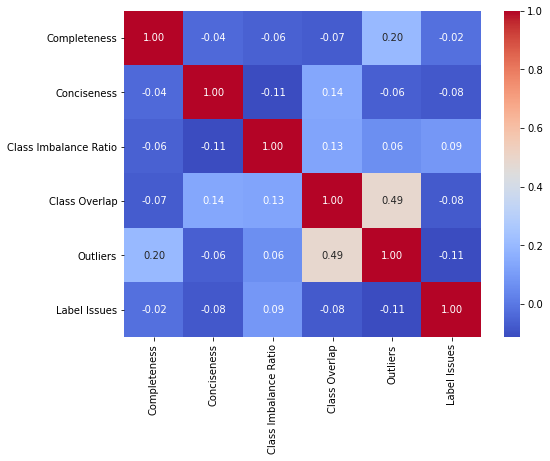

In [36]:
from pandas.plotting import scatter_matrix

bin_df_plot = df[['Completeness', 'Conciseness','ClassImbRatio', 'ClassOverlapPerc', 'OutlierPerc','LabelIssuesPerc']]

bin_df_plot = bin_df_plot.rename(columns={
    'Completeness': 'Completeness',
    'Conciseness': 'Conciseness',
    'ClassImbRatio': 'Class Imbalance Ratio',
    'OutlierPerc' : 'Outliers',
    'ClassOverlapPerc': 'Class Overlap',
    'LabelIssuesPerc' : 'Label Issues'
})


corr_matrix = bin_df_plot.corr()#.style.background_gradient(cmap='coolwarm')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")

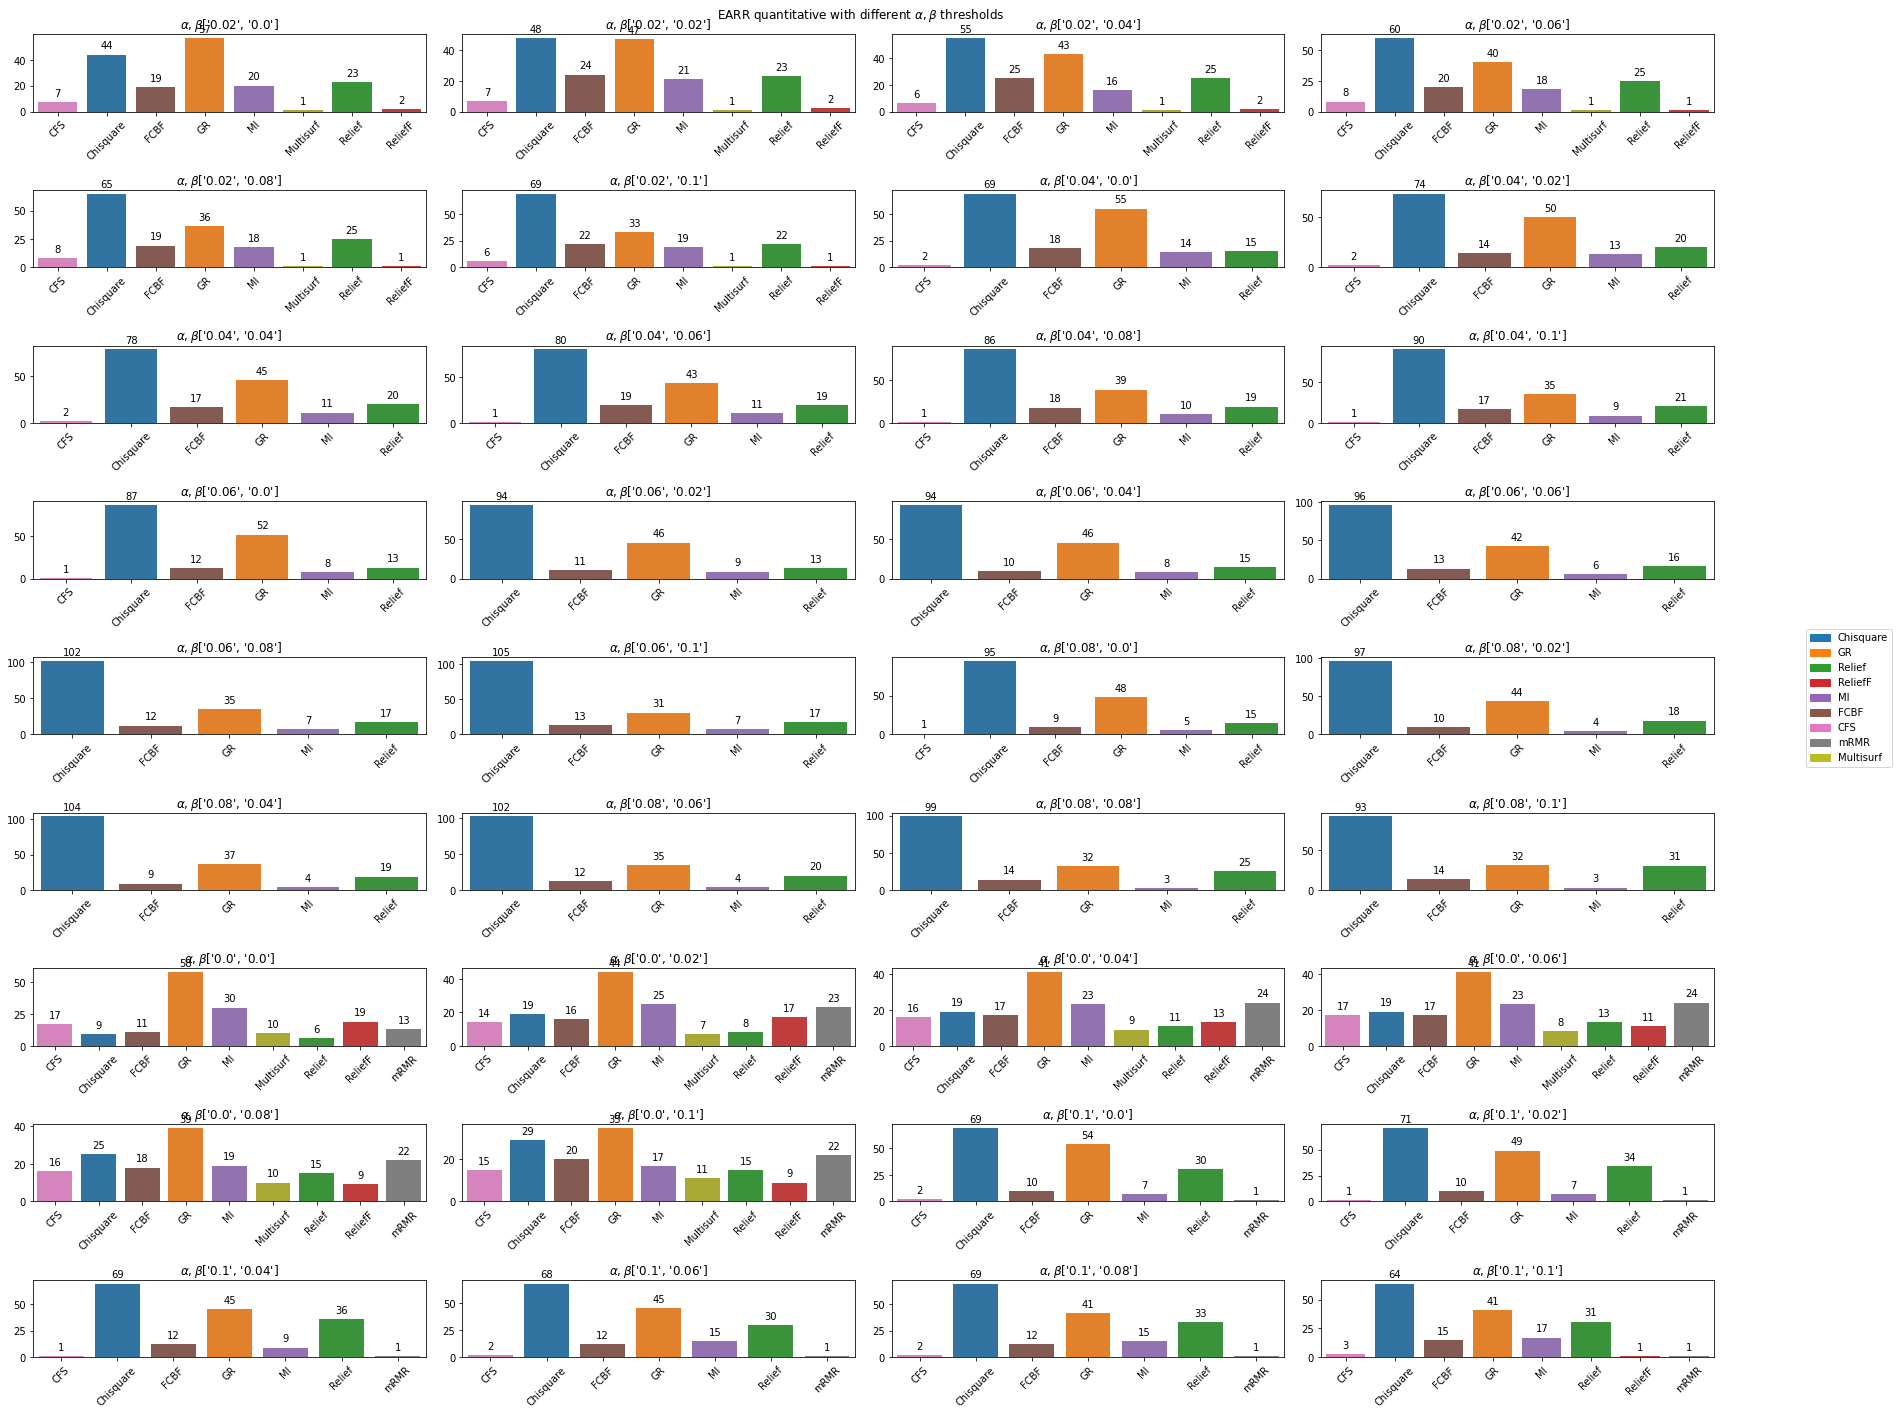

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Define the feature selection algorithms and their renaming
feature_algos = [
    'chisquare', 'GR', 'relief', 'relieff', 'MI',
    'fcbf', 'cfs', 'mrmr', 'multisurf'
]
renamed_algos = [
    'Chisquare', 'GR', 'Relief', 'ReliefF', 'MI',
    'FCBF', 'CFS', 'mRMR', 'Multisurf'
]
rename_dict = dict(zip(feature_algos, renamed_algos))

# Define a consistent color palette for feature selection techniques
palette = sns.color_palette("tab10", len(feature_algos))
color_dict = {renamed_algos[i]: palette[i] for i in range(len(feature_algos))}

fig, axes = plt.subplots(nrows=9, ncols=4, figsize=(24, 20), tight_layout=True)
fig.suptitle('EARR quantitative with different ' + r'$\alpha, \beta$' + ' thresholds')

k = 0
j = 0
abs_path = "/home/d19125691/Documents/Experiments/ontologyDCQ/onto-DCQ-FS_git/optimalalphabeta/dearr_cont"
for files in sorted(os.listdir(abs_path)):
    df = pd.read_csv(os.path.join(abs_path, files))
    df['FeatureAlgo'] = df['FeatureAlgo'].map(rename_dict)  # Rename the algorithms
    value_counts = df['FeatureAlgo'].value_counts().sort_index()
    x_ticks = value_counts.index.tolist()
    counts = value_counts.values.tolist()
    
    # Assign colors to bars based on the feature selection technique
    colors = [color_dict[algo] for algo in x_ticks]
    
    ax = sns.barplot(
        ax=axes[k][j], x=x_ticks, y=counts, palette=colors
    )
    ax.set_title(r'$\alpha, \beta$' + '{}'.format(str(re.findall("\d+\.\d+", files))))
    ax.set_xticklabels(labels=x_ticks, rotation=45)
    
    # Add value counts on each bar
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.0f'),
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center',
            xytext=(0, 9), textcoords='offset points'
        )

    j += 1
    if j == 4:
        k += 1
        j = 0

# Adjust layout to prevent overlap
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.3, hspace=0.4)

# Create a custom legend
handles = [plt.Rectangle((0, 0), 1, 1, color=palette[i]) for i in range(len(renamed_algos))]
labels = renamed_algos
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.1, 0.5))

plt.show()

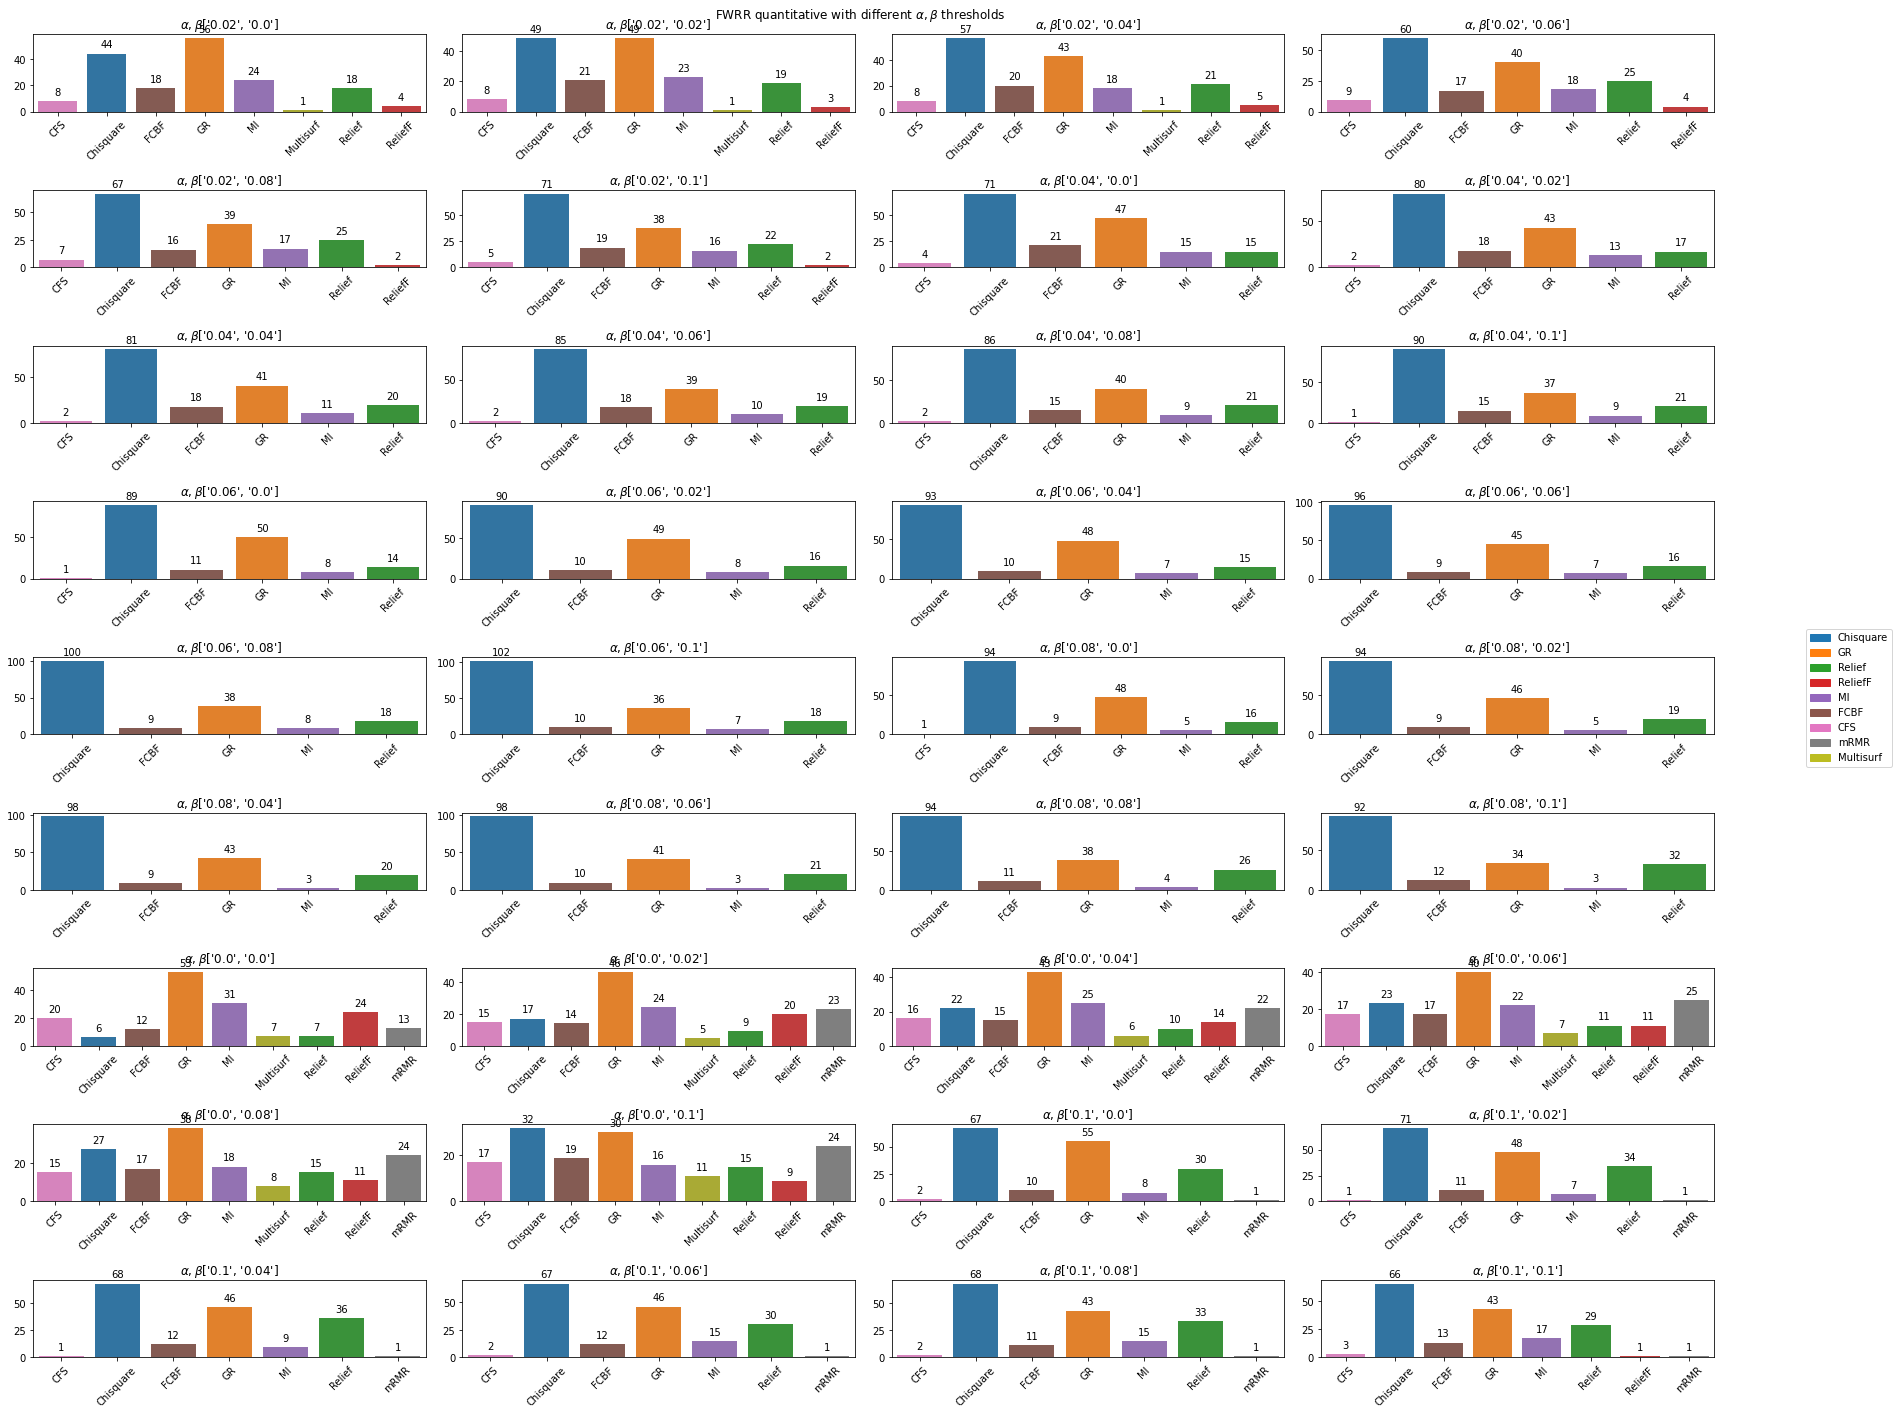

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Define the feature selection algorithms and their renaming
feature_algos = [
    'chisquare', 'GR', 'relief', 'relieff', 'MI',
    'fcbf', 'cfs', 'mrmr', 'multisurf'
]
renamed_algos = [
    'Chisquare', 'GR', 'Relief', 'ReliefF', 'MI',
    'FCBF', 'CFS', 'mRMR', 'Multisurf'
]
rename_dict = dict(zip(feature_algos, renamed_algos))

# Define a consistent color palette for feature selection techniques
palette = sns.color_palette("tab10", len(feature_algos))
color_dict = {renamed_algos[i]: palette[i] for i in range(len(feature_algos))}

fig, axes = plt.subplots(nrows=9, ncols=4, figsize=(24, 20), tight_layout=True)
fig.suptitle('FWRR quantitative with different ' + r'$\alpha, \beta$' + ' thresholds')

k = 0
j = 0
abs_path = "/home/d19125691/Documents/Experiments/ontologyDCQ/onto-DCQ-FS_git/optimalalphabeta/dfwrr_cont"
for files in sorted(os.listdir(abs_path)):
    df = pd.read_csv(os.path.join(abs_path, files))
    df['FeatureAlgo'] = df['FeatureAlgo'].map(rename_dict)  # Rename the algorithms
    value_counts = df['FeatureAlgo'].value_counts().sort_index()
    x_ticks = value_counts.index.tolist()
    counts = value_counts.values.tolist()
    
    # Assign colors to bars based on the feature selection technique
    colors = [color_dict[algo] for algo in x_ticks]
    
    ax = sns.barplot(
        ax=axes[k][j], x=x_ticks, y=counts, palette=colors
    )
    ax.set_title(r'$\alpha, \beta$' + '{}'.format(str(re.findall("\d+\.\d+", files))))
    ax.set_xticklabels(labels=x_ticks, rotation=45)
    
    # Add value counts on each bar
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.0f'),
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center',
            xytext=(0, 9), textcoords='offset points'
        )

    j += 1
    if j == 4:
        k += 1
        j = 0

# Adjust layout to prevent overlap
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.3, hspace=0.4)

# Create a custom legend
handles = [plt.Rectangle((0, 0), 1, 1, color=palette[i]) for i in range(len(renamed_algos))]
labels = renamed_algos
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.1, 0.5))

plt.show()

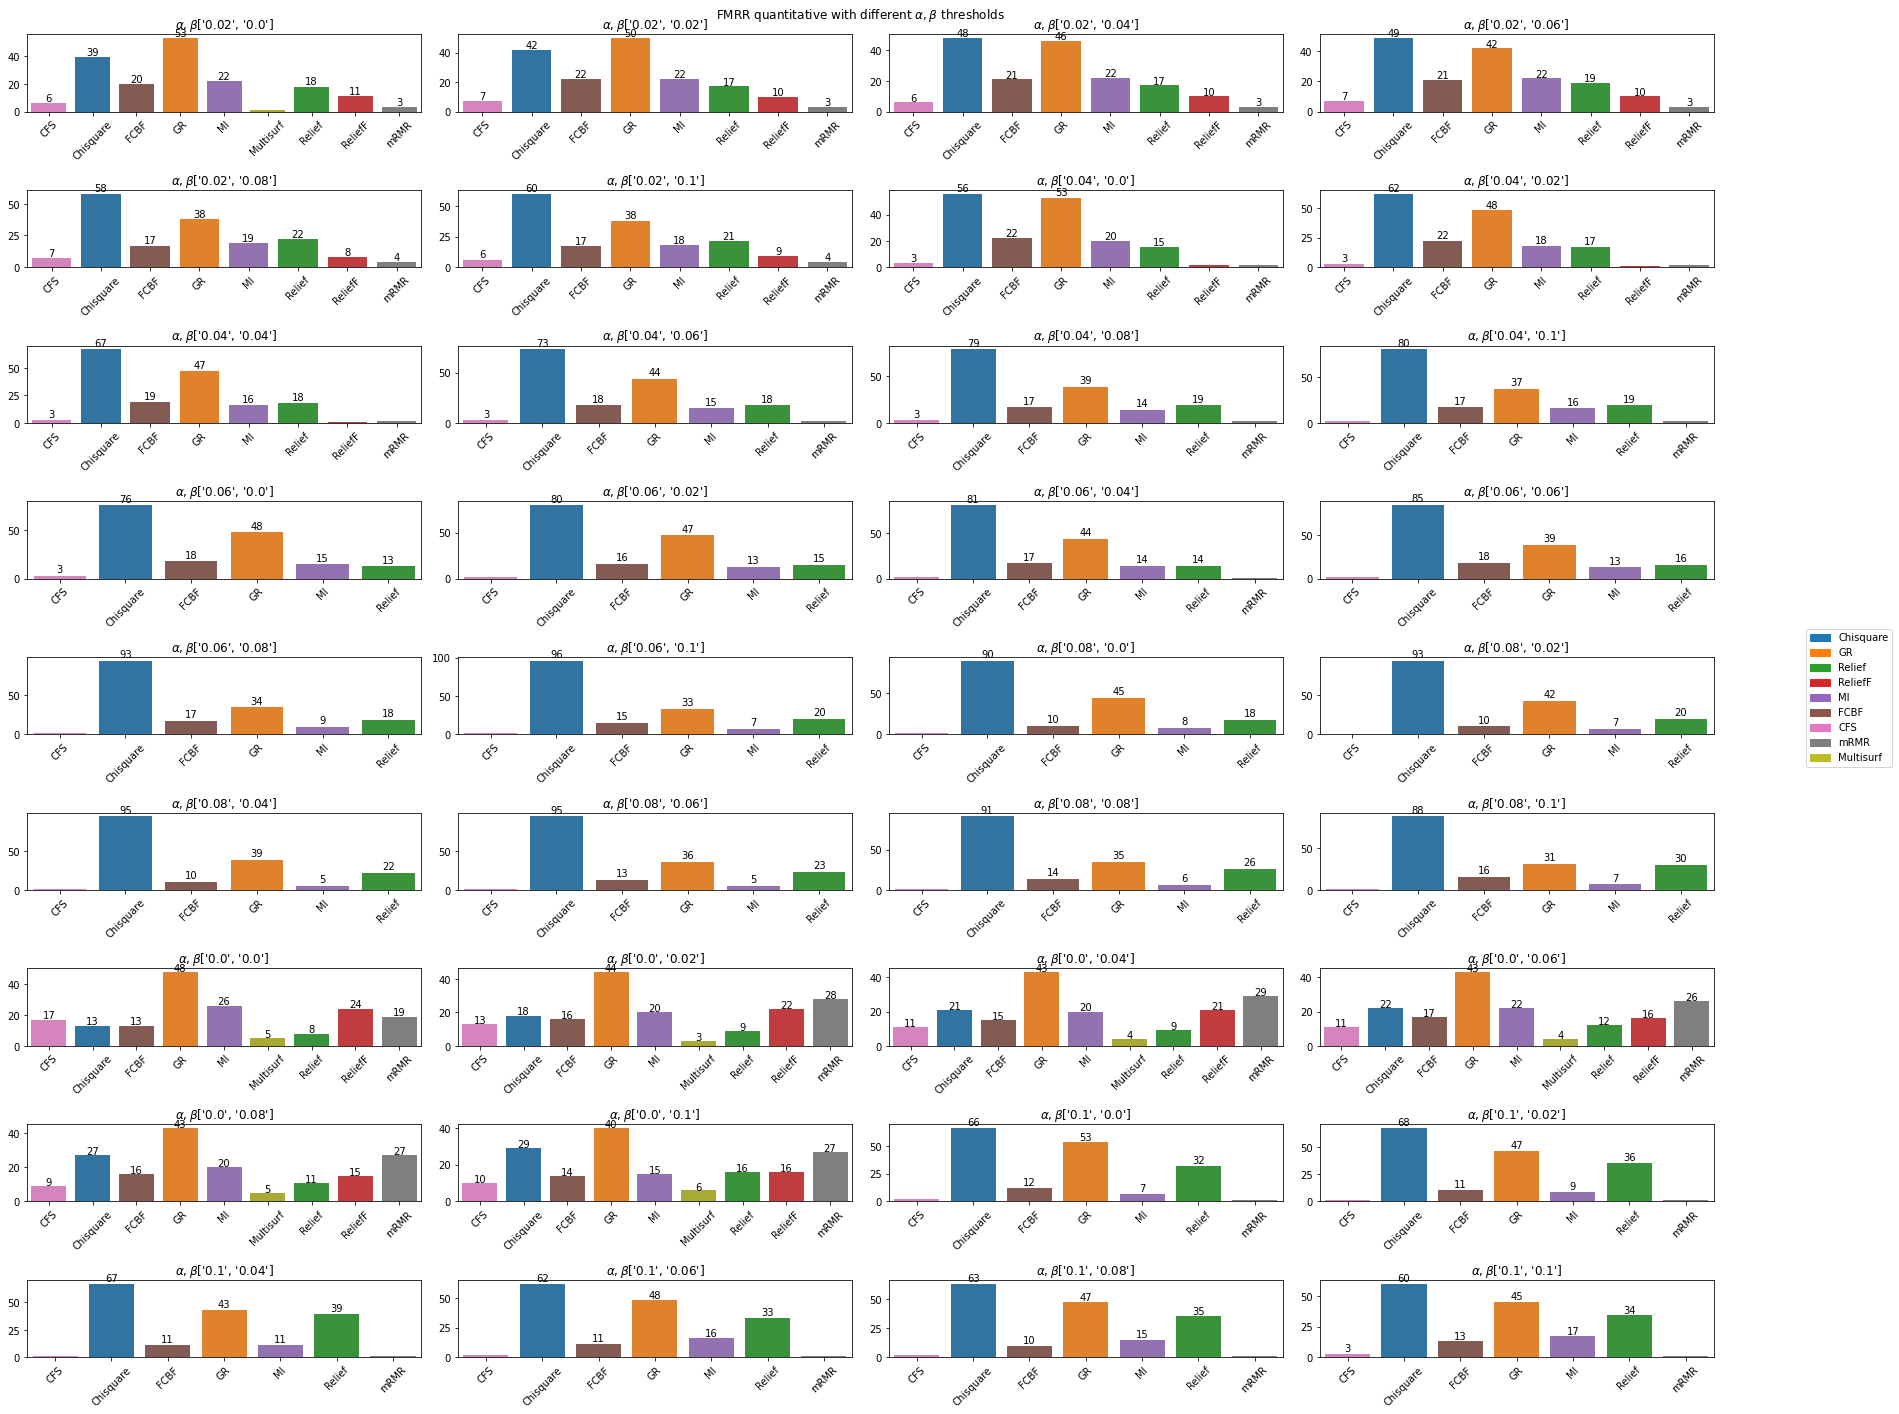

In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Define the feature selection algorithms and their renaming
feature_algos = [
    'chisquare', 'GR', 'relief', 'relieff', 'MI',
    'fcbf', 'cfs', 'mrmr', 'multisurf'
]
renamed_algos = [
    'Chisquare', 'GR', 'Relief', 'ReliefF', 'MI',
    'FCBF', 'CFS', 'mRMR', 'Multisurf'
]
rename_dict = dict(zip(feature_algos, renamed_algos))

# Define a consistent color palette for feature selection techniques
palette = sns.color_palette("tab10", len(feature_algos))
color_dict = {renamed_algos[i]: palette[i] for i in range(len(feature_algos))}

fig, axes = plt.subplots(nrows=9, ncols=4, figsize=(24, 20), tight_layout=True)
fig.suptitle('FMRR quantitative with different ' + r'$\alpha, \beta$' + ' thresholds')

k = 0
j = 0
abs_path = "/home/d19125691/Documents/Experiments/ontologyDCQ/onto-DCQ-FS_git/optimalalphabeta/dfmrr_cont"
for files in sorted(os.listdir(abs_path)):
    df = pd.read_csv(os.path.join(abs_path, files))
    df['FeatureAlgo'] = df['FeatureAlgo'].map(rename_dict)  # Rename the algorithms
    value_counts = df['FeatureAlgo'].value_counts().sort_index()
    x_ticks = value_counts.index.tolist()
    counts = value_counts.values.tolist()
    
    # Assign colors to bars based on the feature selection technique
    colors = [color_dict[algo] for algo in x_ticks]
    
    ax = sns.barplot(
        ax=axes[k][j], x=x_ticks, y=counts, palette=colors
    )
    ax.set_title(r'$\alpha, \beta$' + '{}'.format(str(re.findall("\d+\.\d+", files))))
    ax.set_xticklabels(labels=x_ticks, rotation=45)
    
    # Add value counts on each bar
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.0f'),
            (p.get_x() + p.get_width() / 2., p.get_height()-3),
            ha='center', va='center',
            xytext=(0, 9), textcoords='offset points'
        )

    j += 1
    if j == 4:
        k += 1
        j = 0

# Adjust layout to prevent overlap
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.3, hspace=0.4)

# Create a custom legend
handles = [plt.Rectangle((0, 0), 1, 1, color=palette[i]) for i in range(len(renamed_algos))]
labels = renamed_algos
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.1, 0.5))

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
df_earr = pd.read_csv("/home/d19125691/Documents/Experiments/ontologyDCQ/onto-DCQ-FS_git/optimalalphabeta/dearr_cont/dfearr0.0_0.0.csv")
df_fmrr = pd.read_csv("/home/d19125691/Documents/Experiments/ontologyDCQ/onto-DCQ-FS_git/optimalalphabeta//dfmrr_cont/dffmrr0.0_0.0.csv")
df_fwrr = pd.read_csv("/home/d19125691/Documents/Experiments/ontologyDCQ/onto-DCQ-FS_git/optimalalphabeta//dfwrr_cont/dffwrr0.0_0.0.csv")


df_earr1 = pd.read_csv("/home/d19125691/Documents/Experiments/ontologyDCQ/onto-DCQ-FS_git/optimalalphabeta/dearr_cont/dfearr0.1_0.1.csv")
df_fmrr1 = pd.read_csv("/home/d19125691/Documents/Experiments/ontologyDCQ/onto-DCQ-FS_git/optimalalphabeta/dfmrr_cont/dffmrr0.1_0.1.csv")
df_fwrr1 = pd.read_csv("/home/d19125691/Documents/Experiments/ontologyDCQ/onto-DCQ-FS_git/optimalalphabeta//dfwrr_cont/dffwrr0.1_0.1.csv")


df_earr2 = pd.read_csv("//home/d19125691/Documents/Experiments/ontologyDCQ/onto-DCQ-FS_git/optimalalphabeta//dearr_cont/dfearr0.08_0.06.csv")
df_fmrr2 = pd.read_csv("/home/d19125691/Documents/Experiments/ontologyDCQ/onto-DCQ-FS_git/optimalalphabeta/dfmrr_cont/dffmrr0.08_0.06.csv")
df_fwrr2 = pd.read_csv("/home/d19125691/Documents/Experiments/ontologyDCQ/onto-DCQ-FS_git/optimalalphabeta//dfwrr_cont/dffwrr0.08_0.06.csv")


# Define the feature selection algorithms and their renaming
original_algos = ['chisquare', 'GR', 'relief', 'relieff', 'MI', 'fcbf', 'cfs', 'mrmr', 'multisurf']
renamed_algos = ['Chisquare', 'GR', 'Relief', 'ReliefF', 'MI', 'FCBF', 'CFS', 'mRMR', 'Multisurf']
rename_dict = dict(zip(original_algos, renamed_algos))


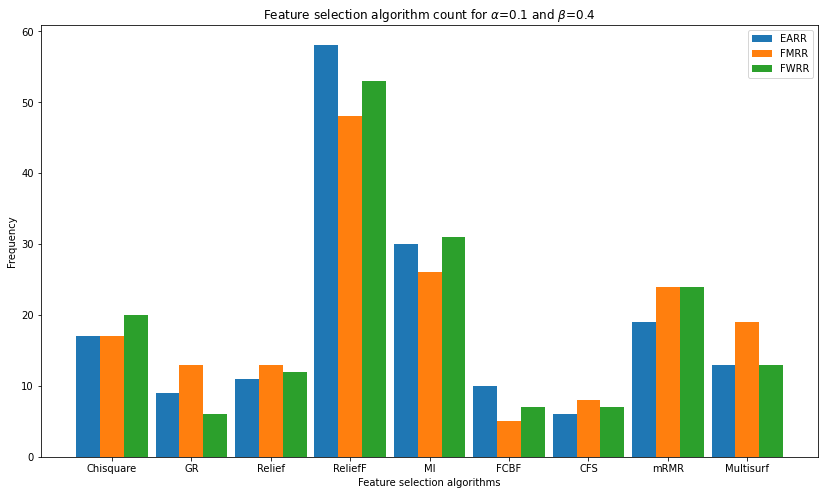

In [7]:
c1 = df_earr['FeatureAlgo'].map(rename_dict).value_counts().reindex(renamed_algos, fill_value=0).sort_index()
c2 = df_fmrr['FeatureAlgo'].map(rename_dict).value_counts().reindex(renamed_algos, fill_value=0).sort_index()
c3 = df_fwrr['FeatureAlgo'].map(rename_dict).value_counts().reindex(renamed_algos, fill_value=0).sort_index()

X = renamed_algos
X_axis = np.arange(len(X))

plt.figure(figsize=(12, 8))
plt.bar(X_axis - 0.3, c1, 0.3, label='EARR')
plt.bar(X_axis, c2, 0.3, label='FMRR')
plt.bar(X_axis + 0.3, c3, 0.3, label='FWRR')

plt.xticks(X_axis, X)
plt.xlabel("Feature selection techniques")
plt.ylabel("Frequency")
plt.title("Feature selection technique count for " + r'$\alpha$' + "=0.0 and " + r'$\beta$' + "=0.0")
plt.legend()

plt.subplots_adjust(left=0.05, bottom=0.15, right=0.95, top=0.9, wspace=0.3, hspace=0.4)

plt.show()

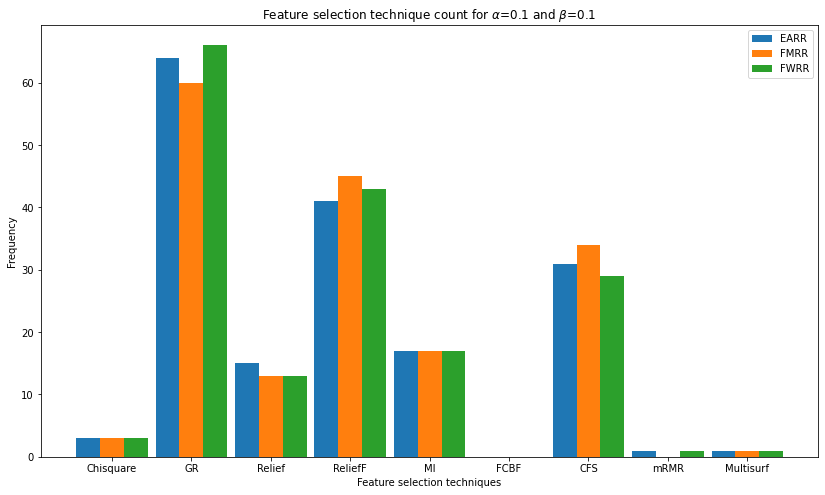

In [12]:
c1 = df_earr1['FeatureAlgo'].map(rename_dict).value_counts().reindex(renamed_algos, fill_value=0).sort_index()
c2 = df_fmrr1['FeatureAlgo'].map(rename_dict).value_counts().reindex(renamed_algos, fill_value=0).sort_index()
c3 = df_fwrr1['FeatureAlgo'].map(rename_dict).value_counts().reindex(renamed_algos, fill_value=0).sort_index()

# X-axis labels
X = renamed_algos
X_axis = np.arange(len(X))

# Bar plot
plt.figure(figsize=(12, 8))
plt.bar(X_axis - 0.3, c1, 0.3, label='EARR')
plt.bar(X_axis, c2, 0.3, label='FMRR')
plt.bar(X_axis + 0.3, c3, 0.3, label='FWRR')

# Adding xticks
plt.xticks(X_axis, X)
plt.xlabel("Feature selection techniques")
plt.ylabel("Frequency")
plt.title("Feature selection technique count for " + r'$\alpha$' + "=0.1 and " + r'$\beta$' + "=0.1")
plt.legend()

# Adjust layout to prevent overlap
plt.subplots_adjust(left=0.05, bottom=0.15, right=0.95, top=0.9, wspace=0.3, hspace=0.4)

plt.show()

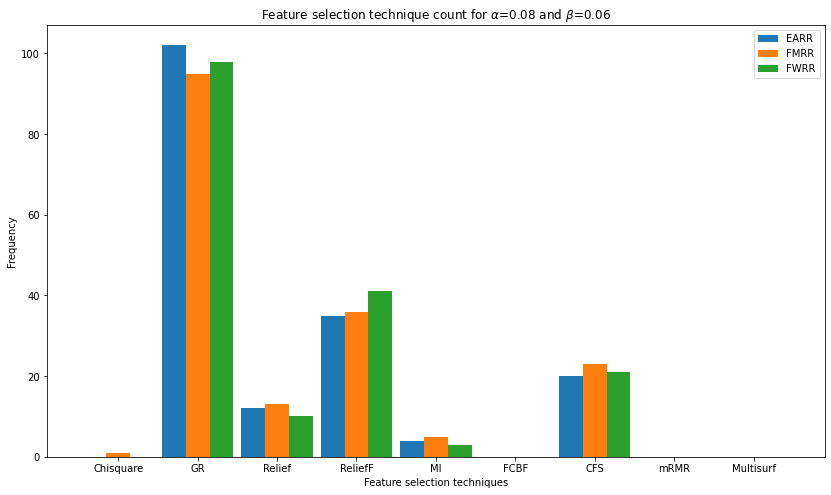

In [14]:
c1 = df_earr2['FeatureAlgo'].map(rename_dict).value_counts().reindex(renamed_algos, fill_value=0).sort_index()
c2 = df_fmrr2['FeatureAlgo'].map(rename_dict).value_counts().reindex(renamed_algos, fill_value=0).sort_index()
c3 = df_fwrr2['FeatureAlgo'].map(rename_dict).value_counts().reindex(renamed_algos, fill_value=0).sort_index()

# X-axis labels
X = renamed_algos
X_axis = np.arange(len(X))

# Bar plot
plt.figure(figsize=(12, 8))
plt.bar(X_axis - 0.3, c1, 0.3, label='EARR')
plt.bar(X_axis, c2, 0.3, label='FMRR')
plt.bar(X_axis + 0.3, c3, 0.3, label='FWRR')

# Adding xticks
plt.xticks(X_axis, X)
plt.xlabel("Feature selection techniques")
plt.ylabel("Frequency")
plt.title("Feature selection technique count for " + r'$\alpha$' + "=0.08 and " + r'$\beta$' + "=0.06")
plt.legend()

# Adjust layout to prevent overlap
plt.subplots_adjust(left=0.05, bottom=0.15, right=0.95, top=0.9, wspace=0.3, hspace=0.4)

plt.show()